In [ ]:
from sklearn import datasets
import matplotlib
import pylab as pl
from itertools import cycle
from sklearn import naive_bayes
import numpy as np
import random as rd
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score

In [ ]:
irisData = datasets.load_iris()
print (irisData.data)
print (irisData.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

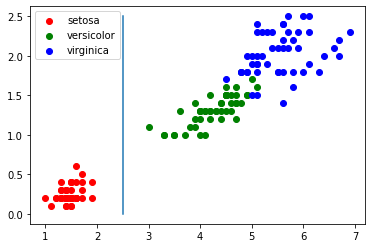

In [ ]:
def plot_2D(data, target, target_names):
 colors = cycle('rgbcmykw') # cycle de couleurs
 target_ids = range(len(target_names))
 pl.figure()
 for i, c, label in zip(target_ids, colors, target_names):
  pl.scatter(data[target == i, 2], data[target == i, 3], c=c, label=label)
 pl.plot([2.5,2.5],[0,2.5])
 pl.legend()
 pl.show()

plot_2D(irisData.data, irisData.target, irisData.target_names)

In [ ]:
nb = naive_bayes.MultinomialNB(fit_prior=True)# un algo d'apprentissage
nb.fit(irisData.data[:], irisData.target[:])
p = nb.predict(irisData.data[:])
print(p)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
ea = 0
for i in range(len(irisData.data)):
  if (p[i] != irisData.target[i]):
    ea = ea+1
print(ea/len(irisData.data))

0.04666666666666667


In [ ]:
print(np.count_nonzero(p-irisData.target)/len(irisData.target))

0.04666666666666667


In [ ]:
nb.score(irisData.data,irisData.target)

0.9533333333333334

In [ ]:

def split(S):
    dataS1 = np.empty(shape=(100,4))
    targetS1= np.empty(shape=(100))
    dataS2 = S.data
    targetS2 = S.target
    # La taille: 2/3 S
    size= int(2*len(S.data)/3)
    for i in range(0,size):
        j = rd.randint(0,len(dataS2)-1)
        dataS1[i] = dataS2[j]
        targetS1[i] = targetS2[j]
        dataS2 = np.delete(dataS2 , j,0)
        targetS2 = np.delete(targetS2,j,0)
    return [dataS1 , targetS1 , dataS2 , targetS2]

split(irisData)

[array([[5.1, 2.5, 3. , 1.1],
        [6.1, 2.8, 4. , 1.3],
        [5.2, 3.5, 1.5, 0.2],
        [5.8, 2.7, 4.1, 1. ],
        [7.7, 2.8, 6.7, 2. ],
        [6.5, 3. , 5.5, 1.8],
        [5.9, 3.2, 4.8, 1.8],
        [4.3, 3. , 1.1, 0.1],
        [7.1, 3. , 5.9, 2.1],
        [6.7, 3. , 5. , 1.7],
        [6.1, 2.6, 5.6, 1.4],
        [7.7, 2.6, 6.9, 2.3],
        [5.6, 2.8, 4.9, 2. ],
        [5.6, 3. , 4.5, 1.5],
        [5.8, 2.7, 3.9, 1.2],
        [4.4, 3.2, 1.3, 0.2],
        [6. , 2.2, 5. , 1.5],
        [5.4, 3.4, 1.5, 0.4],
        [5. , 3.4, 1.5, 0.2],
        [7. , 3.2, 4.7, 1.4],
        [6.7, 3.3, 5.7, 2.5],
        [5.6, 2.5, 3.9, 1.1],
        [5. , 3. , 1.6, 0.2],
        [6.7, 3.1, 4.4, 1.4],
        [5.7, 2.8, 4.1, 1.3],
        [6.3, 2.5, 4.9, 1.5],
        [6.4, 2.7, 5.3, 1.9],
        [6.8, 2.8, 4.8, 1.4],
        [6.9, 3.1, 4.9, 1.5],
        [5.5, 2.4, 3.7, 1. ],
        [5.4, 3.7, 1.5, 0.2],
        [4.9, 3.6, 1.4, 0.1],
        [4.9, 2.4, 3.3, 1. ],
        [4

In [ ]:
def test(S , clf):
    # S :  [dataS1 , targetS1 , dataS2 , targetS2]
    clf.fit(S[0],S[1])
    clf.predict(S[2])
    clf.score(S[2],S[3])
    return 1 - clf.score(S[2],S[3])
clf = naive_bayes.MultinomialNB(fit_prior=True)
Ss = split(irisData)
error  = test(Ss , clf)
print(error)

0.020000000000000018


In [ ]:
def test_with_iterations(S , clf ,t):
    moy_err = 0 
    for i in range(t):
        e = test(S , clf)
        moy_err = moy_err+e
    return moy_err/t
for i in range(20):
    print("erreur avec t= 10",test_with_iterations(Ss , clf ,t=10))
    print("erreur avec t= 50",test_with_iterations(Ss , clf,t=50))
    print("erreur avec t= 100",test_with_iterations(Ss , clf ,t=100))
    print("erreur avec t= 200",test_with_iterations(Ss, clf,t=200))
    print("erreur avec t= 500",test_with_iterations(Ss , clf,t=500))
    print("erreur avec t= 1000",test_with_iterations(Ss , clf ,t=1000))
    print("""---------------""")

erreur avec t= 10 0.020000000000000018
erreur avec t= 50 0.020000000000000018
erreur avec t= 100 0.020000000000000018
erreur avec t= 200 0.020000000000000018
erreur avec t= 500 0.01999999999999975
erreur avec t= 1000 0.019999999999999664
---------------
erreur avec t= 10 0.020000000000000018
erreur avec t= 50 0.020000000000000018
erreur avec t= 100 0.020000000000000018
erreur avec t= 200 0.020000000000000018
erreur avec t= 500 0.01999999999999975
erreur avec t= 1000 0.019999999999999664
---------------
erreur avec t= 10 0.020000000000000018
erreur avec t= 50 0.020000000000000018
erreur avec t= 100 0.020000000000000018
erreur avec t= 200 0.020000000000000018
erreur avec t= 500 0.01999999999999975
erreur avec t= 1000 0.019999999999999664
---------------
erreur avec t= 10 0.020000000000000018
erreur avec t= 50 0.020000000000000018
erreur avec t= 100 0.020000000000000018
erreur avec t= 200 0.020000000000000018
erreur avec t= 500 0.01999999999999975
erreur avec t= 1000 0.019999999999999664


In [ ]:
sizes = [0.1,0.2,0.25,0.33,0.5]
for i in sizes:
    D_train , D_test ,C_train, C_test = train_test_split(irisData.data, irisData.target, train_size=i)
    clf.fit(D_train , C_train)
    prediction = clf.predict(D_test)
    print('pour le test size :' + str(i))
    print('Lerreur est: '+ str(1- clf.score(np.array(D_test), np.array(C_test))))

In [ ]:
print('using cross validation')
folds = [2,3,5,8]
for i in folds:
    print(f"pour {i} folds")
    print(cross_val_score(clf,irisData.data,irisData.target,cv=i))